Import common package

In [1]:
import os
import json

Import Homemade package

In [10]:
from qcat.utility.file_structure import *
from qcat.utility.io_translator import *
# from analysis.analysis_method import *
from qcat.resonator.photon_dep.res_data import *

# 1. Sample path setting
sample_name = "ITRI_364_scalinQ"
project_folder = r"D:\Data\resonator"   # empty string "" for relative path 

# 1.1 File structure setting
sample_root = f"{project_folder}/{sample_name}"
raw_data_fd = f"{sample_root}/raw"
result_folder = f"{project_folder}/{sample_name}/results"

fit_folder = f"{result_folder}/power_dep_fit"



# each cavity file(mat file)
all_resonator_result = []
folder_list = [d for d in os.listdir(raw_data_fd) if os.path.isdir(os.path.join(raw_data_fd, d))]




Start Analysis

In [ ]:
check_configure(f"{sample_root}", ["power_dep_fit"])

for cav_label in folder_list:
    print(f"Processing {cav_label}")

    create_subfolder(fit_folder,cav_label)
    result_folder = f"{fit_folder}/{cav_label}"

    resonator_data_folder = f"{raw_data_fd}/{cav_label}"
    resonator = PhotonDepResonator(cav_label)
    # Find cavity data (mat file) in the folder
    mat_files = check_file_extension( resonator_data_folder, "mat")
    df_config = pd.read_json(f'{resonator_data_folder}/config.json')
    for index, row in df_config.iterrows():
        attenuation = row["attenuation"]
        file_name = row["file_name"]
        print(f"{file_name} with {attenuation} dB attenuation")
        resonator.import_mat(f"{resonator_data_folder}/{file_name}",attenuation)
    result = resonator.refined_analysis( result_folder )
    # result = resonator.free_analysis( result_folder )

    all_resonator_result.append( result )
    
    df_results = pd.concat(all_resonator_result)
    df_results.Name = cav_label

Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

ploting C45505
ploting C46277
ploting C49069
ploting C49936
ploting C51595
ploting C52463
ploting C53941
ploting C54826
ploting C45505
ploting C46277
ploting C49069
ploting C49936
ploting C51595
ploting C52463
ploting C53941
ploting C54826
ploting C45505
ploting C46277
ploting C49069
ploting C49936
ploting C51595
ploting C52463
ploting C53941
ploting C54826
ploting C45505
ploting C46277
ploting C49069
ploting C49936
ploting C51595
ploting C52463
ploting C53941
ploting C54826
ploting C45505
ploting C46277
ploting C49069
ploting C49936
ploting C51595
ploting C52463
ploting C53941
ploting C54826
ploting C45505
ploting C46277
ploting C49069
ploting C49936
ploting C51595
ploting C52463
ploting C53941
ploting C54826


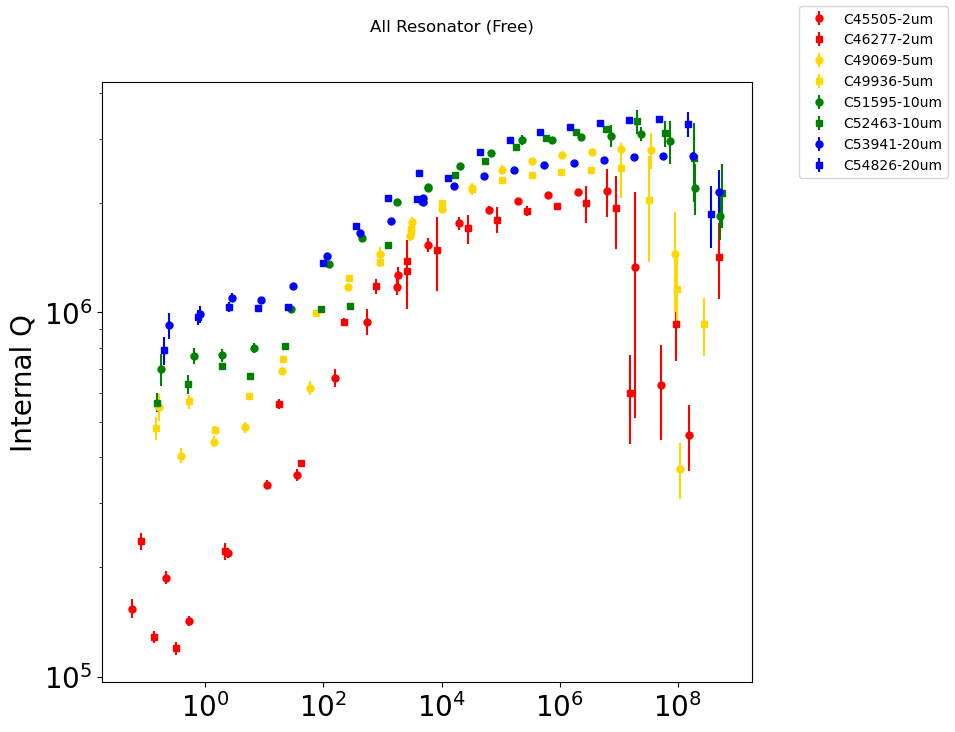

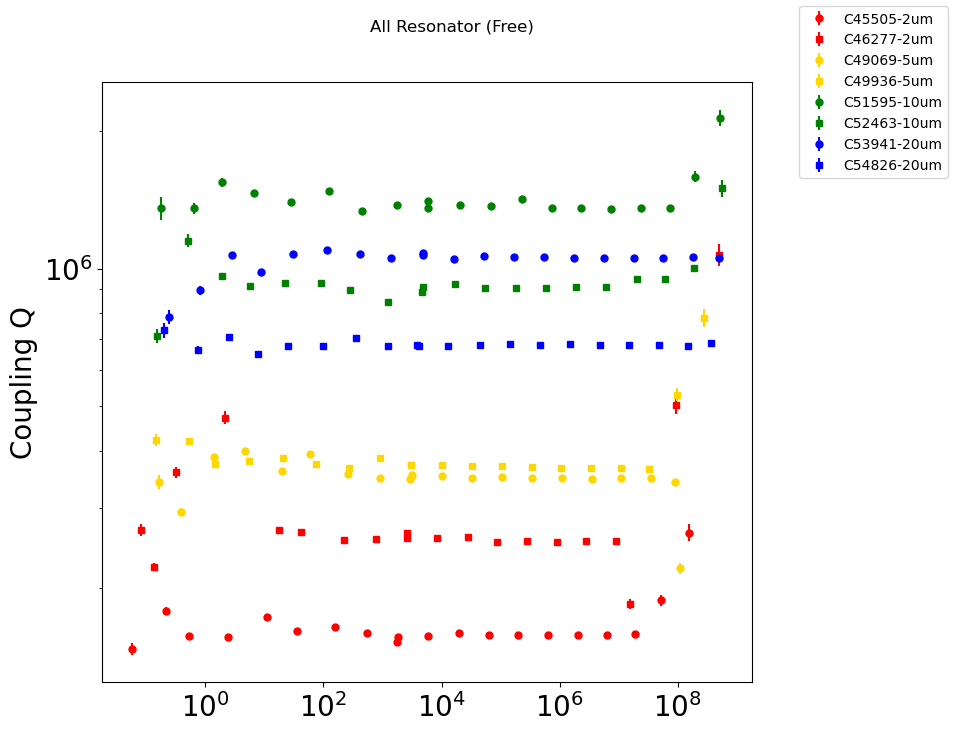

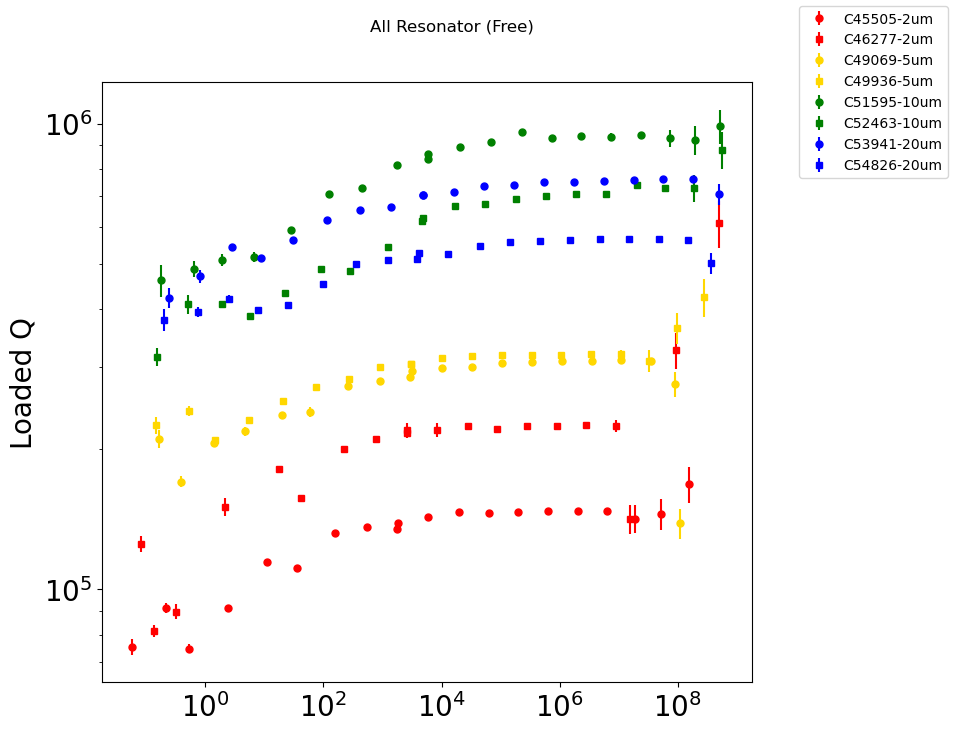

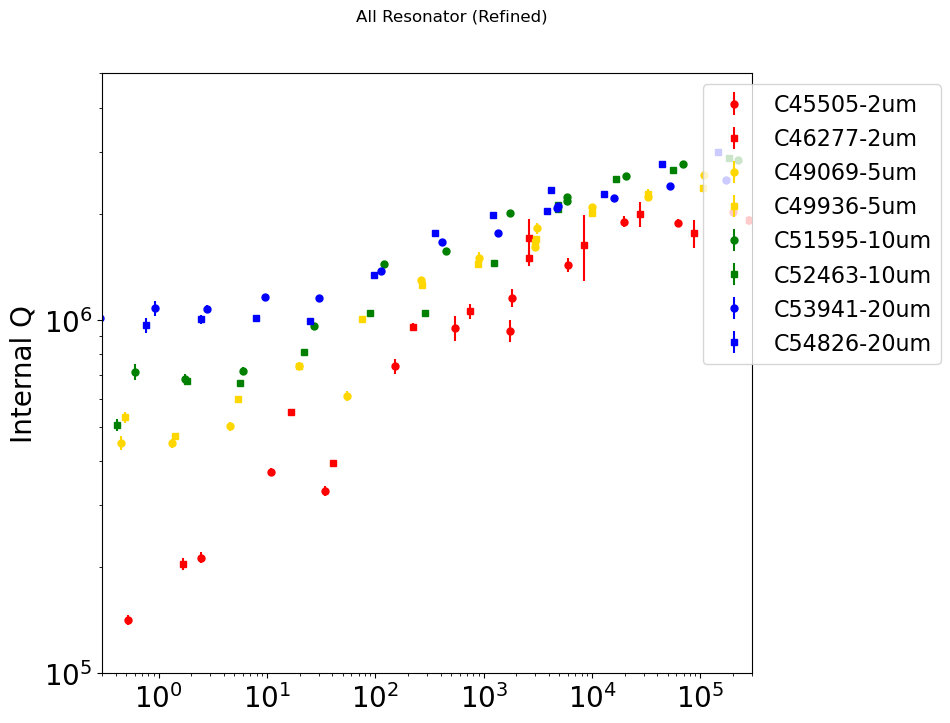

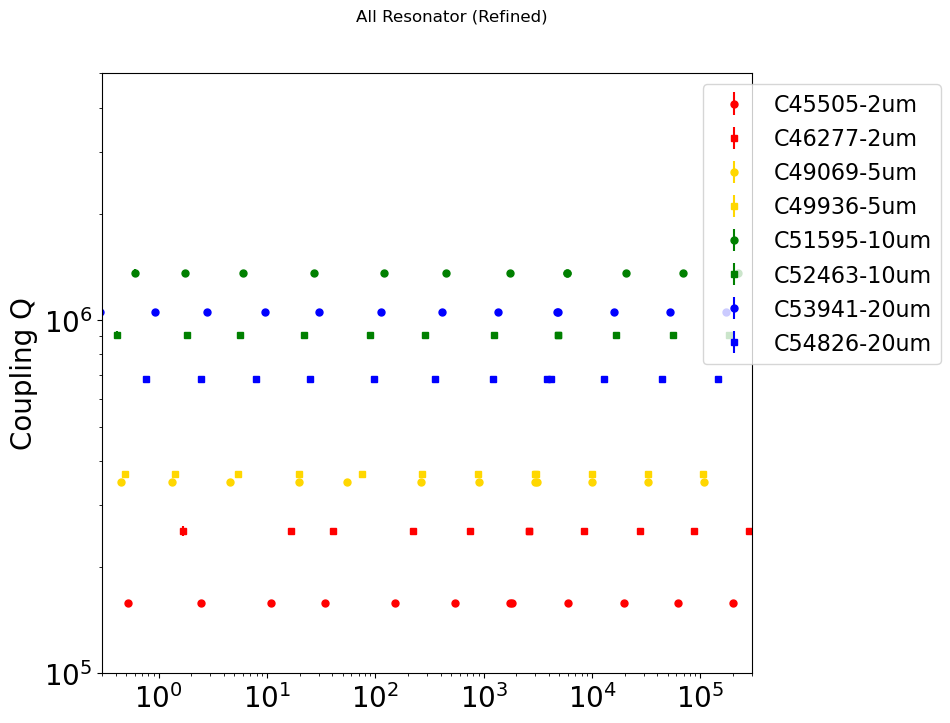

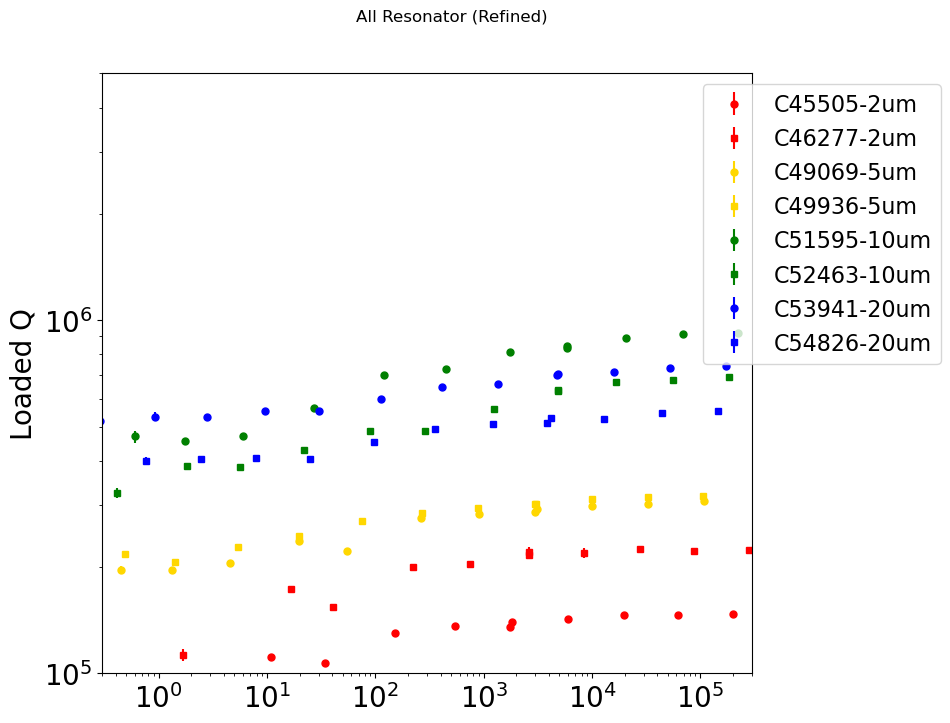

In [11]:
# each cavity file(mat file)
from qcat.visualization.photon_dep_loss import * 
all_resonator_result = []
folder_list = [d for d in os.listdir(raw_data_fd) if os.path.isdir(os.path.join(raw_data_fd, d))]

fr = []
qc = []
for cav_label in folder_list:
    create_subfolder(fit_folder,cav_label)
    result_folder = f"{fit_folder}/{cav_label}"

    # Plotting
    df_powerQ_free = pd.read_csv( f"{fit_folder}/{cav_label}/free_result.csv" )
    plot_singleRes_powerQ_free(df_powerQ_free, cav_label=f"{cav_label}", output_fd=result_folder)
    plot_singleRes_powerloss_free(df_powerQ_free, cav_label=f"{cav_label}", output_fd=result_folder)

    df_powerQ_refined = pd.read_csv( f"{fit_folder}/{cav_label}/refined_result.csv" )
    plot_singleRes_powerQ_refined(df_powerQ_refined, cav_label=f"{cav_label}", output_fd=result_folder)
    plot_singleRes_powerloss_refined(df_powerQ_refined, cav_label=f"{cav_label}", output_fd=result_folder)
    fr.append(df_powerQ_refined["fr"].values[-1])
    qc.append(df_powerQ_refined["Qc_dia_corr_fixed"].values[-1])

## After assignment each cavity, get foward analysis
assignment = pd.read_json(f"{raw_data_fd}/assignment.json")
plot_multiRes_powerQ_free( fit_folder, assignment, fit_folder)
plot_multiRes_powerQ_refined( fit_folder, assignment, fit_folder, ((3e-1,3e5),(1e5,5e6)))

pd.DataFrame({"fr":np.array(fr),"Qc":np.array(qc)}).to_csv( f"{fit_folder}/Qc.csv" )